### Map in RGB color

In [1]:
import pandas as pd
import pycountry
import geopandas as gpd
import numpy as np
import os
import glob
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

def get_color(color_rgb):
    (r,g,b) = color_rgb
    if not math.isnan(r):
        return mpl.colors.rgb2hex(color_rgb)
    else:
        return np.nan

def create_map_RGB(fname, map_fname, img_title=''):
    regDF = pd.read_csv(fname)
    # Match the Twitter Country Code(iso_a2) againts GeoPandas CC (iso_a3)
    countries = []
    for cc  in regDF['country']:
        iso_a3 = pycountry.countries.get(alpha_2=cc)
        if  iso_a3 is None:
            print("Error: no translation to iso_a3, country code : " , cc)
            regDF.drop(regDF[regDF['country'] == cc].index, inplace=True)
            continue
        countries.append(iso_a3.alpha_3)

    regDF.set_axis(countries, axis="index", inplace=True)
    regDF['iso_a3'] = countries

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = world[(world.pop_est>0) & (world.name!="Antarctica")]

    # Fixing the error in country's name that comes from Geopandas
    world.loc[world['name'] == 'France', ['iso_a3']] = 'FRA'
    world.loc[world['name'] == 'Norway', ['iso_a3']] = 'NOR'
    
    world.set_axis(world['iso_a3'], axis="index", inplace=True)
    world = world.join(regDF, rsuffix='_csv')
    
    world["RGB"] = world[['R','G','B' ]].apply(tuple, axis=1)
    world['color'] = world["RGB"].apply(get_color)
    world.loc[world['color'].isnull(), "RGB"]=np.nan

    c_df = pd.DataFrame(world[world["color"].notnull()]["RGB"])
    colors_1 = c_df.sort_values(by=["RGB"])["RGB"].to_list()
    cmap_name = 'colors_RGB'
    cmap= LinearSegmentedColormap.from_list(cmap_name, colors_1)
    plt.register_cmap(cmap=cmap)
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_axis_off()
    ax.set(title=img_title)
    fig.set_facecolor("w")
    world.plot( column="RGB",  ax=ax,  alpha=0.8, legend=False, edgecolor='k', linewidth=0.2,  cmap="colors_RGB",
            missing_kwds={
                "color": "white",
                #"edgecolor": "red",
                #"hatch": "///",
                #"label": "Missing values",
            },
    )
    fig.savefig(map_fname, bbox_inches = 'tight', dpi=300)
    print("figure created: ", map_fname )

## Building the map in RGB color

Error: no translation to iso_a3, country code :  ALL
figure created:  ../figs/fig-colormap-common-voc-semantic-6.png
Error: no translation to iso_a3, country code :  ALL


/tmp/ipykernel_1309534/2033257529.py:53: UserWarning: Trying to register the cmap 'colors_RGB' which already exists.
  plt.register_cmap(cmap=cmap)


figure created:  ../figs/fig-colormap-common-voc-semantic-4.png
Error: no translation to iso_a3, country code :  ALL


/tmp/ipykernel_1309534/2033257529.py:53: UserWarning: Trying to register the cmap 'colors_RGB' which already exists.
  plt.register_cmap(cmap=cmap)


figure created:  ../figs/fig-colormap-common-voc-semantic-8.png
Error: no translation to iso_a3, country code :  ALL


/tmp/ipykernel_1309534/2033257529.py:53: UserWarning: Trying to register the cmap 'colors_RGB' which already exists.
  plt.register_cmap(cmap=cmap)


figure created:  ../figs/fig-colormap-common-voc-semantic-10.png
Error: no translation to iso_a3, country code :  ALL


/tmp/ipykernel_1309534/2033257529.py:53: UserWarning: Trying to register the cmap 'colors_RGB' which already exists.
  plt.register_cmap(cmap=cmap)


figure created:  ../figs/fig-colormap-common-voc-semantic-12.png


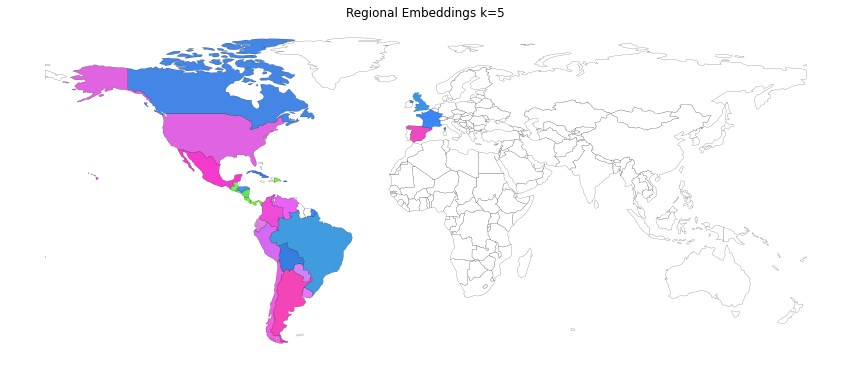

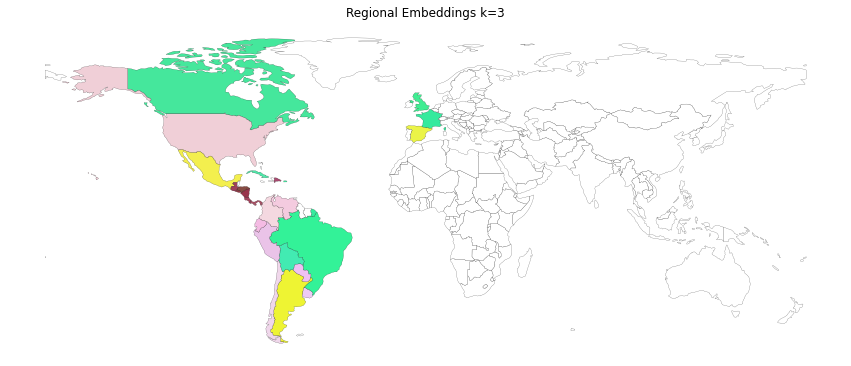

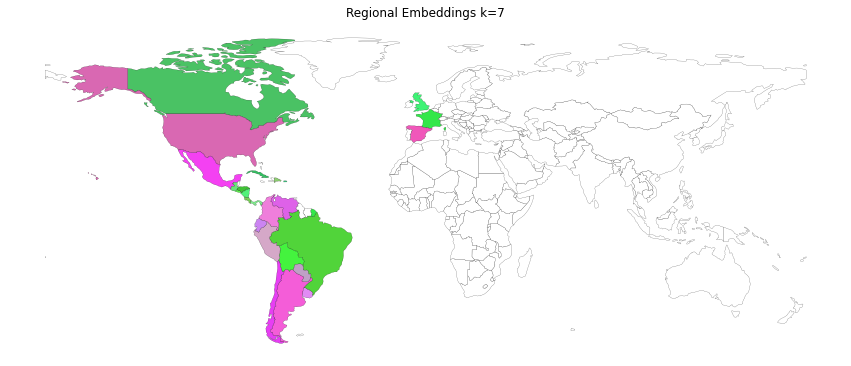

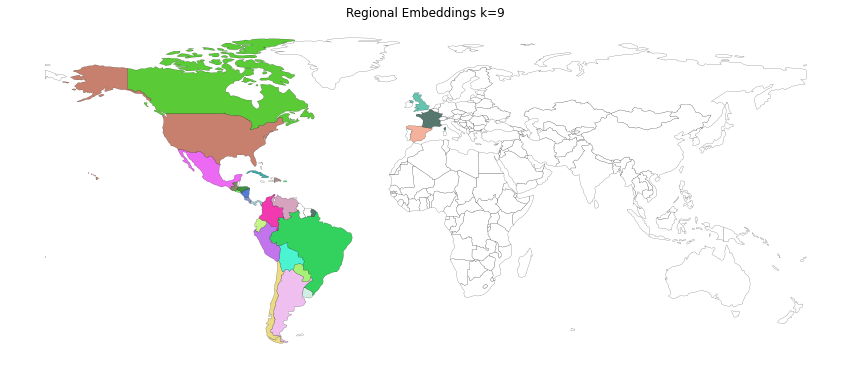

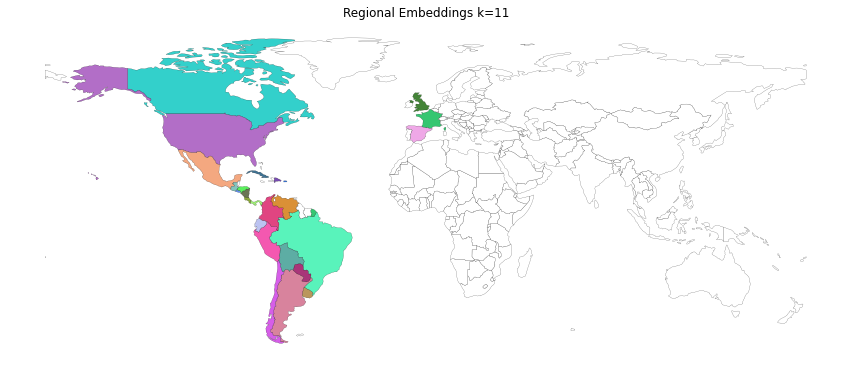

In [2]:
for fname in glob.glob("../data/SpanishLang/embeddings/colormap-common-voc-semantic-*.csv"):
    #fname = "region-emo-colors-clustering-umap-12.json"
    name = os.path.basename(fname[:-4])
    k = int(name.split("-")[-1]) - 1
    img_title = 'Regional Embeddings k=' + str(k)
    map_fname = "../figs/fig-" + name + ".png"
    create_map_RGB(fname, map_fname, img_title)

In [ ]:
for fname in glob.glob("../data/SpanishLang/colormap-common-voc-lexical-*.csv"):
    #fname = "region-emo-colors-clustering-umap-12.json"
    name = os.path.basename(fname[:-4])
    k = int(name.split("-")[-1]) - 1
    img_title = 'Regional vocabularies k=' + str(k)
    map_fname = "../figs/fig-" + name + ".png"
    create_map_RGB(fname, map_fname, img_title)

/tmp/ipykernel_1309534/2033257529.py:53: UserWarning: Trying to register the cmap 'colors_RGB' which already exists.
  plt.register_cmap(cmap=cmap)


figure created:  ../figs/fig-colormap-common-voc-lexical-4.png


/tmp/ipykernel_1309534/2033257529.py:53: UserWarning: Trying to register the cmap 'colors_RGB' which already exists.
  plt.register_cmap(cmap=cmap)


figure created:  ../figs/fig-colormap-common-voc-lexical-6.png


/tmp/ipykernel_1309534/2033257529.py:53: UserWarning: Trying to register the cmap 'colors_RGB' which already exists.
  plt.register_cmap(cmap=cmap)


figure created:  ../figs/fig-colormap-common-voc-lexical-8.png


/tmp/ipykernel_1309534/2033257529.py:53: UserWarning: Trying to register the cmap 'colors_RGB' which already exists.
  plt.register_cmap(cmap=cmap)
